In [ ]:
import pandas as pd

df = pd.read_csv("results.csv", encoding="latin1", parse_dates=['DateTime'])
df.columns = df.columns.str.strip()   
df.info()
df.head()


   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Season    11113 non-null  object             
 1   DateTime  11113 non-null  datetime64[ns, UTC]
 2   HomeTeam  11113 non-null  object             
 3   AwayTeam  11113 non-null  object             
 4   FTHG      11113 non-null  int64              
 5   FTAG      11113 non-null  int64              
 6   FTR       11113 non-null  object             
 7   HTHG      10189 non-null  float64            
 8   HTAG      10189 non-null  float64            
 9   HTR       10189 non-null  object             
 10  Referee   8289 non-null   object             
 11  HS        8289 non-null   float64            
 12  AS        8289 non-null   float64            
 13  HST       8289 non-null   float64            
 14  AST       8289 non-null   float64            
 15  HC        8289 non-

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00+00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['Season'] >= '2015-16']

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.day_name()


In [18]:
df[['Season','DateTime','HomeTeam','AwayTeam','FTHG','FTAG','FTR','Weekday']].head()


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Weekday
8524,2015-16,2015-08-08 00:00:00+00:00,Bournemouth,Aston Villa,0,1,A,Saturday
8525,2015-16,2015-08-08 00:00:00+00:00,Chelsea,Swansea,2,2,D,Saturday
8526,2015-16,2015-08-08 00:00:00+00:00,Everton,Watford,2,2,D,Saturday
8527,2015-16,2015-08-08 00:00:00+00:00,Leicester,Sunderland,4,2,H,Saturday
8528,2015-16,2015-08-08 00:00:00+00:00,Man United,Tottenham,1,0,H,Saturday


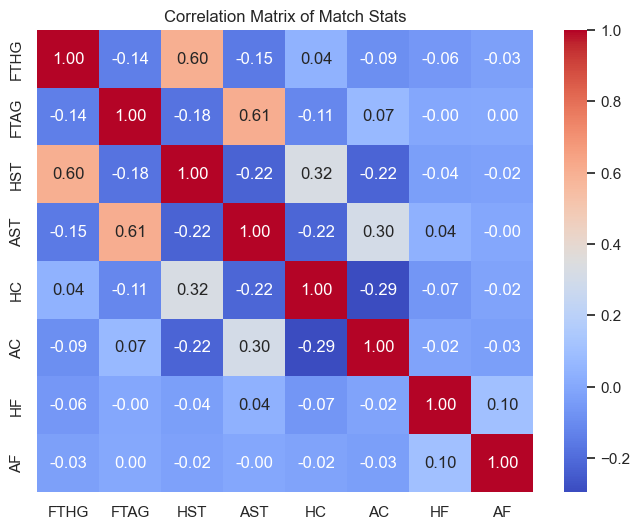

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df[['FTHG','FTAG','HST','AST','HC','AC','HF','AF']].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Match Stats")
plt.show()


In [20]:
import scipy.stats as stats

cont_table = pd.crosstab(df['Weekday'], df['FTR'])
chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print("Chi-square test: chi2=%.2f, p-value=%.4f" % (chi2, p))


Chi-square test: chi2=7.05, p-value=0.8543


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('HST ~ C(FTR)', data=df.dropna(subset=['HST'])).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)



                sum_sq      df           F         PR(>F)
C(FTR)     3555.374487     2.0  315.054932  3.546943e-123
Residual  14591.421187  2586.0         NaN            NaN


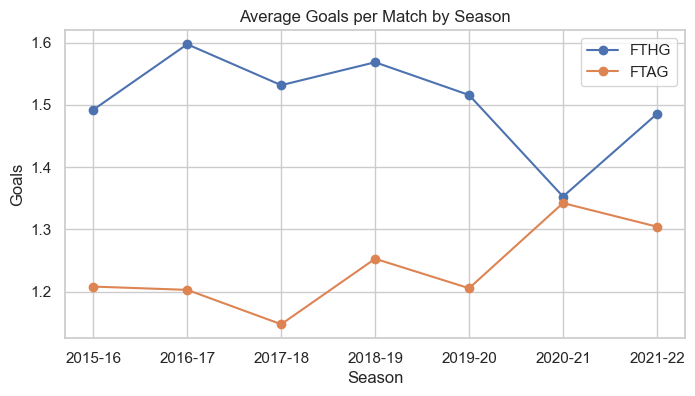

In [22]:
season_goals = df.groupby('Season')[['FTHG','FTAG']].mean()

season_goals.plot(marker='o', figsize=(8,4))
plt.title("Average Goals per Match by Season")
plt.ylabel("Goals")
plt.show()
